## Stochastic Gradient Descent Vs Batch Gradient Descent Vs Mini Gradient Descent
**Gradient descent** is an optimization algorithm used in deep learning to update the parameters of a model in order to reduce its loss. It works by taking small steps in the direction of the negative gradient of the cost function with respect to the model parameters. The size of the steps taken is determined by the learning rate. Through successive iterations, the parameters of the model are updated until the cost function is minimized.

**Batch gradient descent (BGD)** is a method used in deep learning to calculate the gradient of a loss function with respect to the weights of a neural network for a single batch of data. It does this by computing the gradient for each training example in the batch and then taking the average of all of these gradients. This approach allows for more accurate updates of the weights, which in turn can lead to faster convergence of the model.

**Stochastic gradient descent (SGD)** is an iterative optimization algorithm for finding the minimum of a function. It is used in machine learning to update the weights of a neural network. SGD works by minimizing a given function by taking steps in the opposite direction of the gradient of the function at a current point. In each step, the model parameters are updated according to the gradient of the loss function with respect to the current parameters. This allows the model to converge towards the global minimum.

**Mini Batch gradient descent (MBGD)** is an optimization algorithm used to train deep learning models. It is a variation of the gradient descent algorithm that splits the training data into small batches, and then performs an update for each batch. This allows the model to converge faster than normal gradient descent, as the model is constantly being updated with new information. The mini-batch size can be tuned to find the best performance for a given dataset and model.

* The **main difference between batch gradient descent, stochastic gradient descent and mini-batch gradient descent** is the amount of data used to calculate the gradient of the loss function. Batch gradient descent uses the entire training dataset to calculate the gradient. Stochastic gradient descent uses a single sample from the training dataset, while mini-batch gradient descent uses a small batch of samples. Mini-batch gradient descent is usually preferred over the other two methods as it can converge faster and often yields better results.
* For Implementation we use house prediction dataset.

In [1]:
# Required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Next we need to load the CSV file:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
11,2785,4,140.00
13,1100,2,40.00
0,1056,2,39.07
4,1200,2,51.00
2,1440,3,62.00


In [7]:
# As we see the dataset is not scalled, we see the (area vs bedrooms) they both are not scale, so let's first do scaling.
# So we use MinMaxScaller and then we create x_scaled and y_scaled:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [8]:
# So scaled_X is:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [9]:
# & scaleed_y is:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

### Implementing Batch Gradient Descent

In [10]:
# So now both X and y are scaled. The next step is to implement batch gradient descent. The goal id to find w1, w2 and bias by running gradient descent algorithm.
# So we defined the batch gradient descent function. As result it gives us w1, w2, b and cost.
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

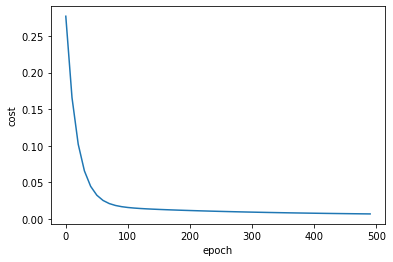

In [11]:
# Now to plot the chart to see how the cost is reduces:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [12]:
# Now let's define the prediction function to make prediction. First we need to scale the values of area and bedroom which we pass to the function inside the function. Then at the end we revers the the result but to original form using sy scaller.
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b) 

C:\Users\Habib\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [13]:
# let's prdict another home:
predict(1500,3,w,b)

C:\Users\Habib\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

### Implementing Stochastic Gradient Descent

In [17]:
# So here instead of using every sample, we pick a random samples using 'random' library of python:
import random
random.randint(0,10)

4

In [19]:
# So here using random library we get random indexes from radom X and Y samples.
# The only change with Batch GD is here instead of using whole X and Y, we just use one sample.

def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70760731, 0.6752577 ]), -0.2324352455833645, 0.0003169659873856762)

In [20]:
# So let's print the BGD w, bias and cost here for comparsion:
w, b, cost    

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [ ]:
* As we see the values are lookin quite similar.

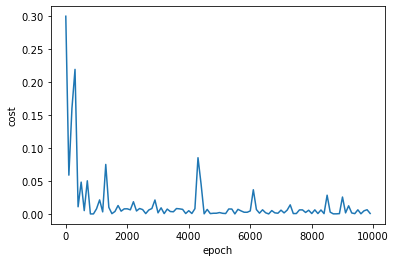

In [21]:
# Now let's plot the SGD Vs cost:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [22]:
# To make some prediction:
predict(2600,4,w_sgd, b_sgd) 

C:\Users\Habib\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.2836964903292

### Exercise (Implementing Mimi Batch Gradient Descent)
Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples

In [ ]:
# 
